# University of Waterloo Data Science Club  
## Exploratory Data Analysis  
### *Last 120 Years of Olympic Sporting History*


--Importing Neccesary Libraries used--

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

--Loading dataset--

In [147]:
data = pd.read_csv("dataset_olympics.csv")

--displaying first few rows of dataset--

In [148]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


--Here the information given about the athletes can be seen-- 

ID, Name, Sex, Age, height, Weight, team, NOC, Games, Year, City, Sport, Event and Medal

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


--Now here is the summary statistics of numerical columns--

There are some interesting features to notice within this dataset including the large count and the standard deviations

In [150]:
data.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


--Here there are unique and most frequent value counts that can be seen--

For example, the Summer 2016 Games have the most data available

-->Likely due to it being the most recent in the dataset and featuring the most athletes as sports have expanded throuhgout the years.

In [151]:
data.describe(include=["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


## Cleaning Data Now

--Now checking for missing values in the dataset (1st step in cleaning the data)--

In [152]:
data.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

It can be observed that there are: 

2732 missing data entries for age. 16254 missing data entries for Height. And 17101 missing data entries for Weight

The missing entries for medals will be treated differently as only 1st, 2nd and 3rd recieve medals. 

--Now the missing values for Age, Height and Weight will be filled with mean values (2nd step in cleaning data)--

In [ ]:
data["Age"].fillna((data["Age"].mean()), inplace = True)
data["Height"].fillna((data["Height"].mean()), inplace = True)
data["Weight"].fillna((data["Weight"].mean()), inplace = True)

--The missing entries for medals can also now be replaced with a tag of "No Medal" (3rd step in cleaning data)--

In [ ]:
data['Medal'].fillna('No Medal', inplace = True)

--Now that the missing data is cleaned, it can be checked for missing values again, clearly there aren't any missing values now--

In [155]:
data.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

--Now the duplicate data must be cleaned, there is 383 pieces observed--

In [156]:
data.duplicated().sum()

383

--The duplicates will be dropped--

In [157]:
data.drop_duplicates(inplace = True)

--Now there are 0 duplicates observed in data (4th step in cleaning data)--

In [158]:
data.duplicated().sum()

0

# All the data has now been cleaned!
## The missing values and duplicates have been dealt with

# Now, the visualisation and relationship analysis will take place

## Here are the Univariate Analysis

### Gender Distribution
It is clear that historically men have appeared more then twice as much in the olympics 

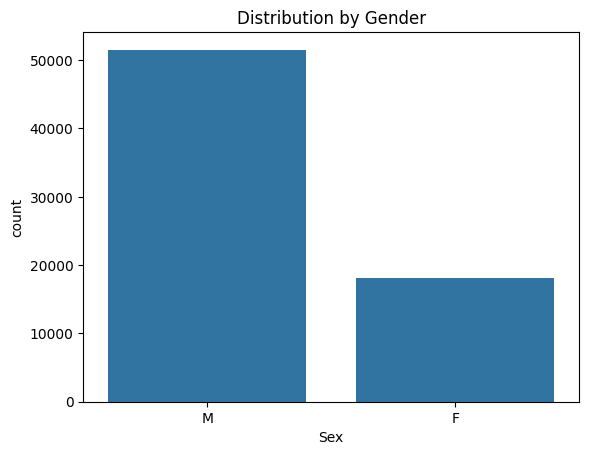

In [159]:
sns.countplot(data = data, x = "Sex")
plt.title("Distribution by Gender")
plt.show()

### Age Distribution

Most Olympic athletes are concentrated in their 20s, with fewer participants in their 30s and above. This aligns with peak physical performance ages.

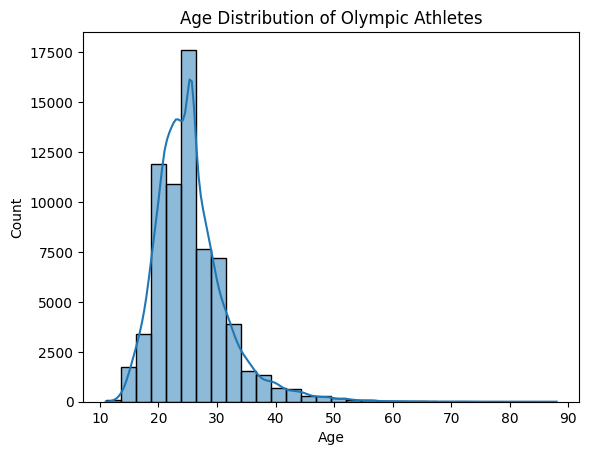

In [160]:
sns.histplot(data["Age"], bins=30, kde=True)
plt.title("Age Distribution of Olympic Athletes")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Height Distribution

The majority of athletes fall within the 165–190 cm range, though extremes exist in specialized sports (e.g., gymnasts shorter, basketball players taller).

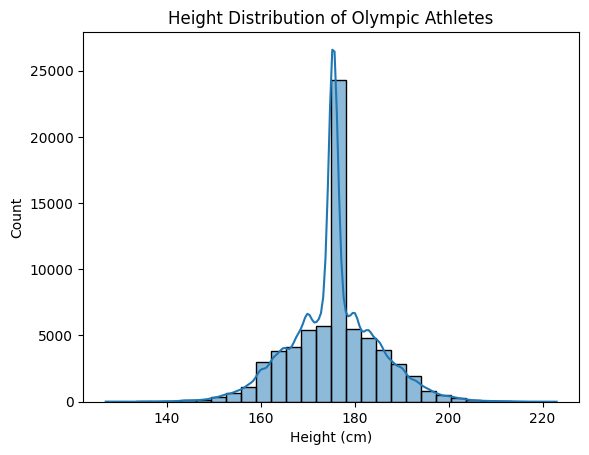

In [161]:
sns.histplot(data["Height"], bins=30, kde=True)
plt.title("Height Distribution of Olympic Athletes")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.show()

## Weight Distribution

Athletes’ weights are right-skewed, with most between 60–80 kg. Heavier athletes tend to compete in strength-based sports.

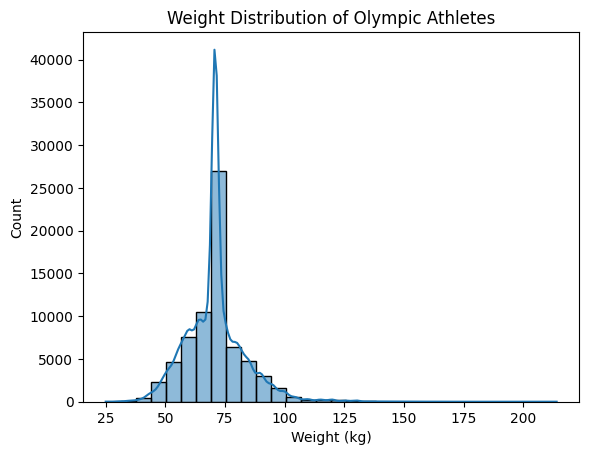

In [162]:
sns.histplot(data["Weight"], bins=30, kde=True)
plt.title("Weight Distribution of Olympic Athletes")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.show()

## Medal Distribution

The majority of entries are “No Medal,” which makes sense since only a small percentage of athletes win medals. It can also be seen that there is an equal amount of Gold, Silver and Bronze--> Which makes sense since each event requires one of each.

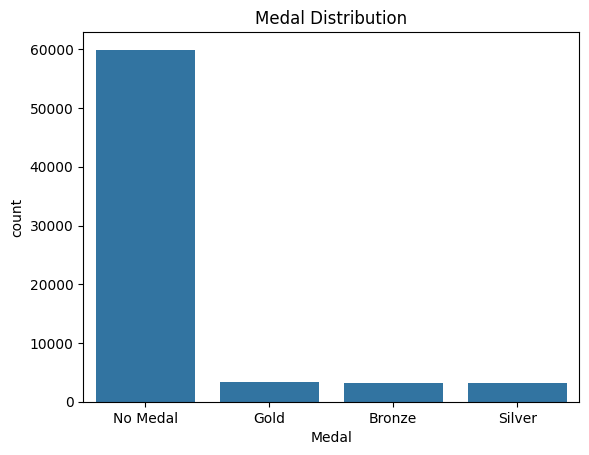

In [163]:
sns.countplot(data=data, x="Medal", order=data["Medal"].value_counts().index)
plt.title("Medal Distribution")
plt.show()

## Top 10 Sports by Participation

Athletics (track & field) dominate athlete participation, reflecting the many events and broad accessibility.

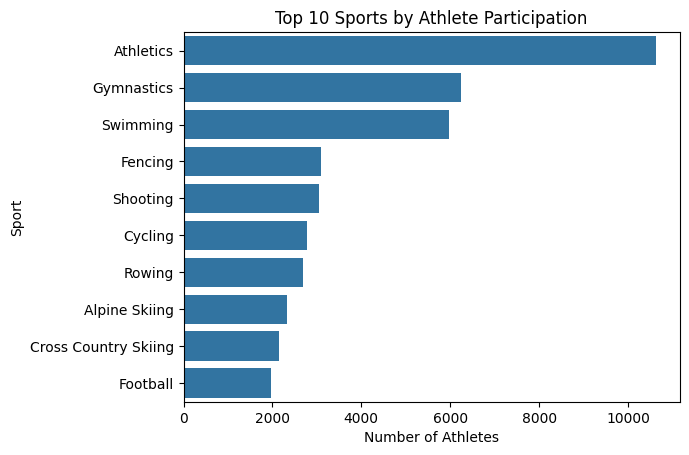

In [164]:
top_sports = data["Sport"].value_counts().head(10)
sns.barplot(x=top_sports.values, y=top_sports.index)
plt.title("Top 10 Sports by Athlete Participation")
plt.xlabel("Number of Athletes")
plt.show()